# Setup

### Import libraries

In [97]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix

### Print all cell outputs instead of just last one

In [38]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Print full output, not sectioned

In [39]:
from pandas import DataFrame
from IPython.display import HTML
def print_full (element):
    return (HTML(DataFrame(element).to_html()))

pd.options.display.max_rows = 4000

### Improve image quality

In [ ]:
%config InlineBackend.figure_format ='retina'

# Data

In [40]:
df = pd.read_csv('speeddating.csv')

## Data Inspect

In [41]:
df.shape

(8378, 123)

In [42]:
print_full(df.columns)

In [43]:
print_full(df.dtypes[df.dtypes != 'object'])

In [44]:
print_full(df.head())

## Data Cleaning

### Columns to Drop

Columns with bins | repeated data

In [45]:
bin_columns = [i for i in df.columns if i.startswith('d_')]
bin_columns = bin_columns[1:]

Columns with data not relevant

In [46]:
columns_drop = ['has_null', 'wave', 'age_o', 'decision','decision_o', 'race_o']

Columns 'rate yourself' | not relevant

In [47]:
columns_rate_yourself = ['attractive', 'sincere', 'intelligence', 'funny', 'ambition']

Drop columns

In [48]:
df_drop = df.drop((bin_columns + columns_drop + columns_rate_yourself), axis = 1)

### Columns to Encode

In [49]:
columns_encoding = ['gender', 'race', 'field']

### Columns to Convert to Int 

In [50]:
columns_convert = [i for i in df_drop.columns if i not in columns_encoding]

Convert to float, coercing '?' entries

In [51]:
for i in columns_convert:
    df_drop[i] = df_drop[i].apply(pd.to_numeric, errors = 'coerce')
df_drop = df_drop.dropna()

Convert floats to int

In [52]:
for i in columns_convert:
    df_drop[i] = df_drop[i].apply(lambda x: int(x))

## One-Hot-Enconding

In [53]:
df_drop = pd.get_dummies(data = df_drop, columns = columns_encoding, drop_first = True)

# Correlations

In [54]:
df_drop.corr()

age     d_age  samerace  \
age                                            1.000000  0.338975  0.043514   
d_age                                          0.338975  1.000000 -0.047196   
samerace                                       0.043514 -0.047196  1.000000   
importance_same_race                          -0.156998 -0.098540  0.080228   
importance_same_religion                       0.076977  0.041306  0.089389   
pref_o_attractive                             -0.117705 -0.061365 -0.012744   
pref_o_sincere                                 0.066798  0.089025  0.031532   
pref_o_intelligence                            0.070888  0.092489 -0.051070   
pref_o_funny                                  -0.077452 -0.095781  0.078315   
pref_o_ambitious                               0.039919 -0.072130  0.030802   
pref_o_shared_interests                        0.072904  0.093595 -0.057298   
attractive_o                                  -0.119688 -0.111757  0.067839   
sinsere_o                                     -0.020684 -0.054096 -0.012788   
intelligence_o                                 0.016218 -0.051287 -0.006122   
funny_o                                       -0.053418 -0.051822 -0.013373   
ambitous_o                                     0.006577 -0.065455  0.054326   
shared_interests_o                            -0.002902 -0.021302  0.097605   
attractive_important                          -0.022624 -0.076582  0.055392   
sincere_important                              0.218719  0.120092 -0.015829   
intellicence_important                         0.142692  0.119943 -0.056207   
funny_important                               -0.258600 -0.120974  0.072684   
ambtition_important                           -0.046148 -0.055525 -0.026565   
shared_interests_important                    -0.004295  0.081124 -0.080851   
attractive_partner                            -0.017146 -0.111528  0.048841   
sincere_partner                               -0.056094 -0.074013 -0.027161   
intelligence_partner                          -0.027799 -0.068026 -0.022856   
funny_partner                                  0.030085 -0.046605 -0.028552   
ambition_partner                              -0.009048 -0.051158  0.039312   
shared_interests_partner                       0.050037 -0.016112  0.055779   
sports                                        -0.076258 -0.019405 -0.002501   
tvsports                                      -0.165784 -0.046027  0.023890   
exercise                                      -0.115338 -0.079018  0.059596   
dining                                         0.100723 -0.071423  0.000224   
museums                                        0.215300 -0.037322  0.042427   
art                                            0.150131 -0.033041  0.005325   
hiking                                         0.049643 -0.036987  0.089625   
gaming                                        -0.126613 -0.081721  0.053019   
clubbing                                      -0.061470 -0.150301  0.022408   
reading                                        0.091631 -0.026792 -0.051136   
tv                                            -0.310124 -0.050032 -0.056496   
theater                                        0.104959 -0.037701  0.018969   
movies                                         0.050412  0.082617 -0.081962   
concerts                                      -0.100575 -0.075326 -0.059060   
music                                         -0.042005 -0.017429 -0.086269   
shopping                                      -0.170326 -0.117729 -0.077142   
yoga                                           0.038686 -0.052163 -0.012478   
interests_correlate                                 NaN       NaN       NaN   
expected_happy_with_sd_people                  0.158494  0.089319  0.063489   
expected_num_interested_in_me                 -0.028385 -0.086696  0.112803   
expected_num_matches                           0.149088 -0.000782  0.048988   
like                   

Inspect column interests

In [55]:
df_drop.interests_correlate.unique()

array([0])

In [56]:
df_drop.drop('interests_correlate', axis = 1, inplace = True)

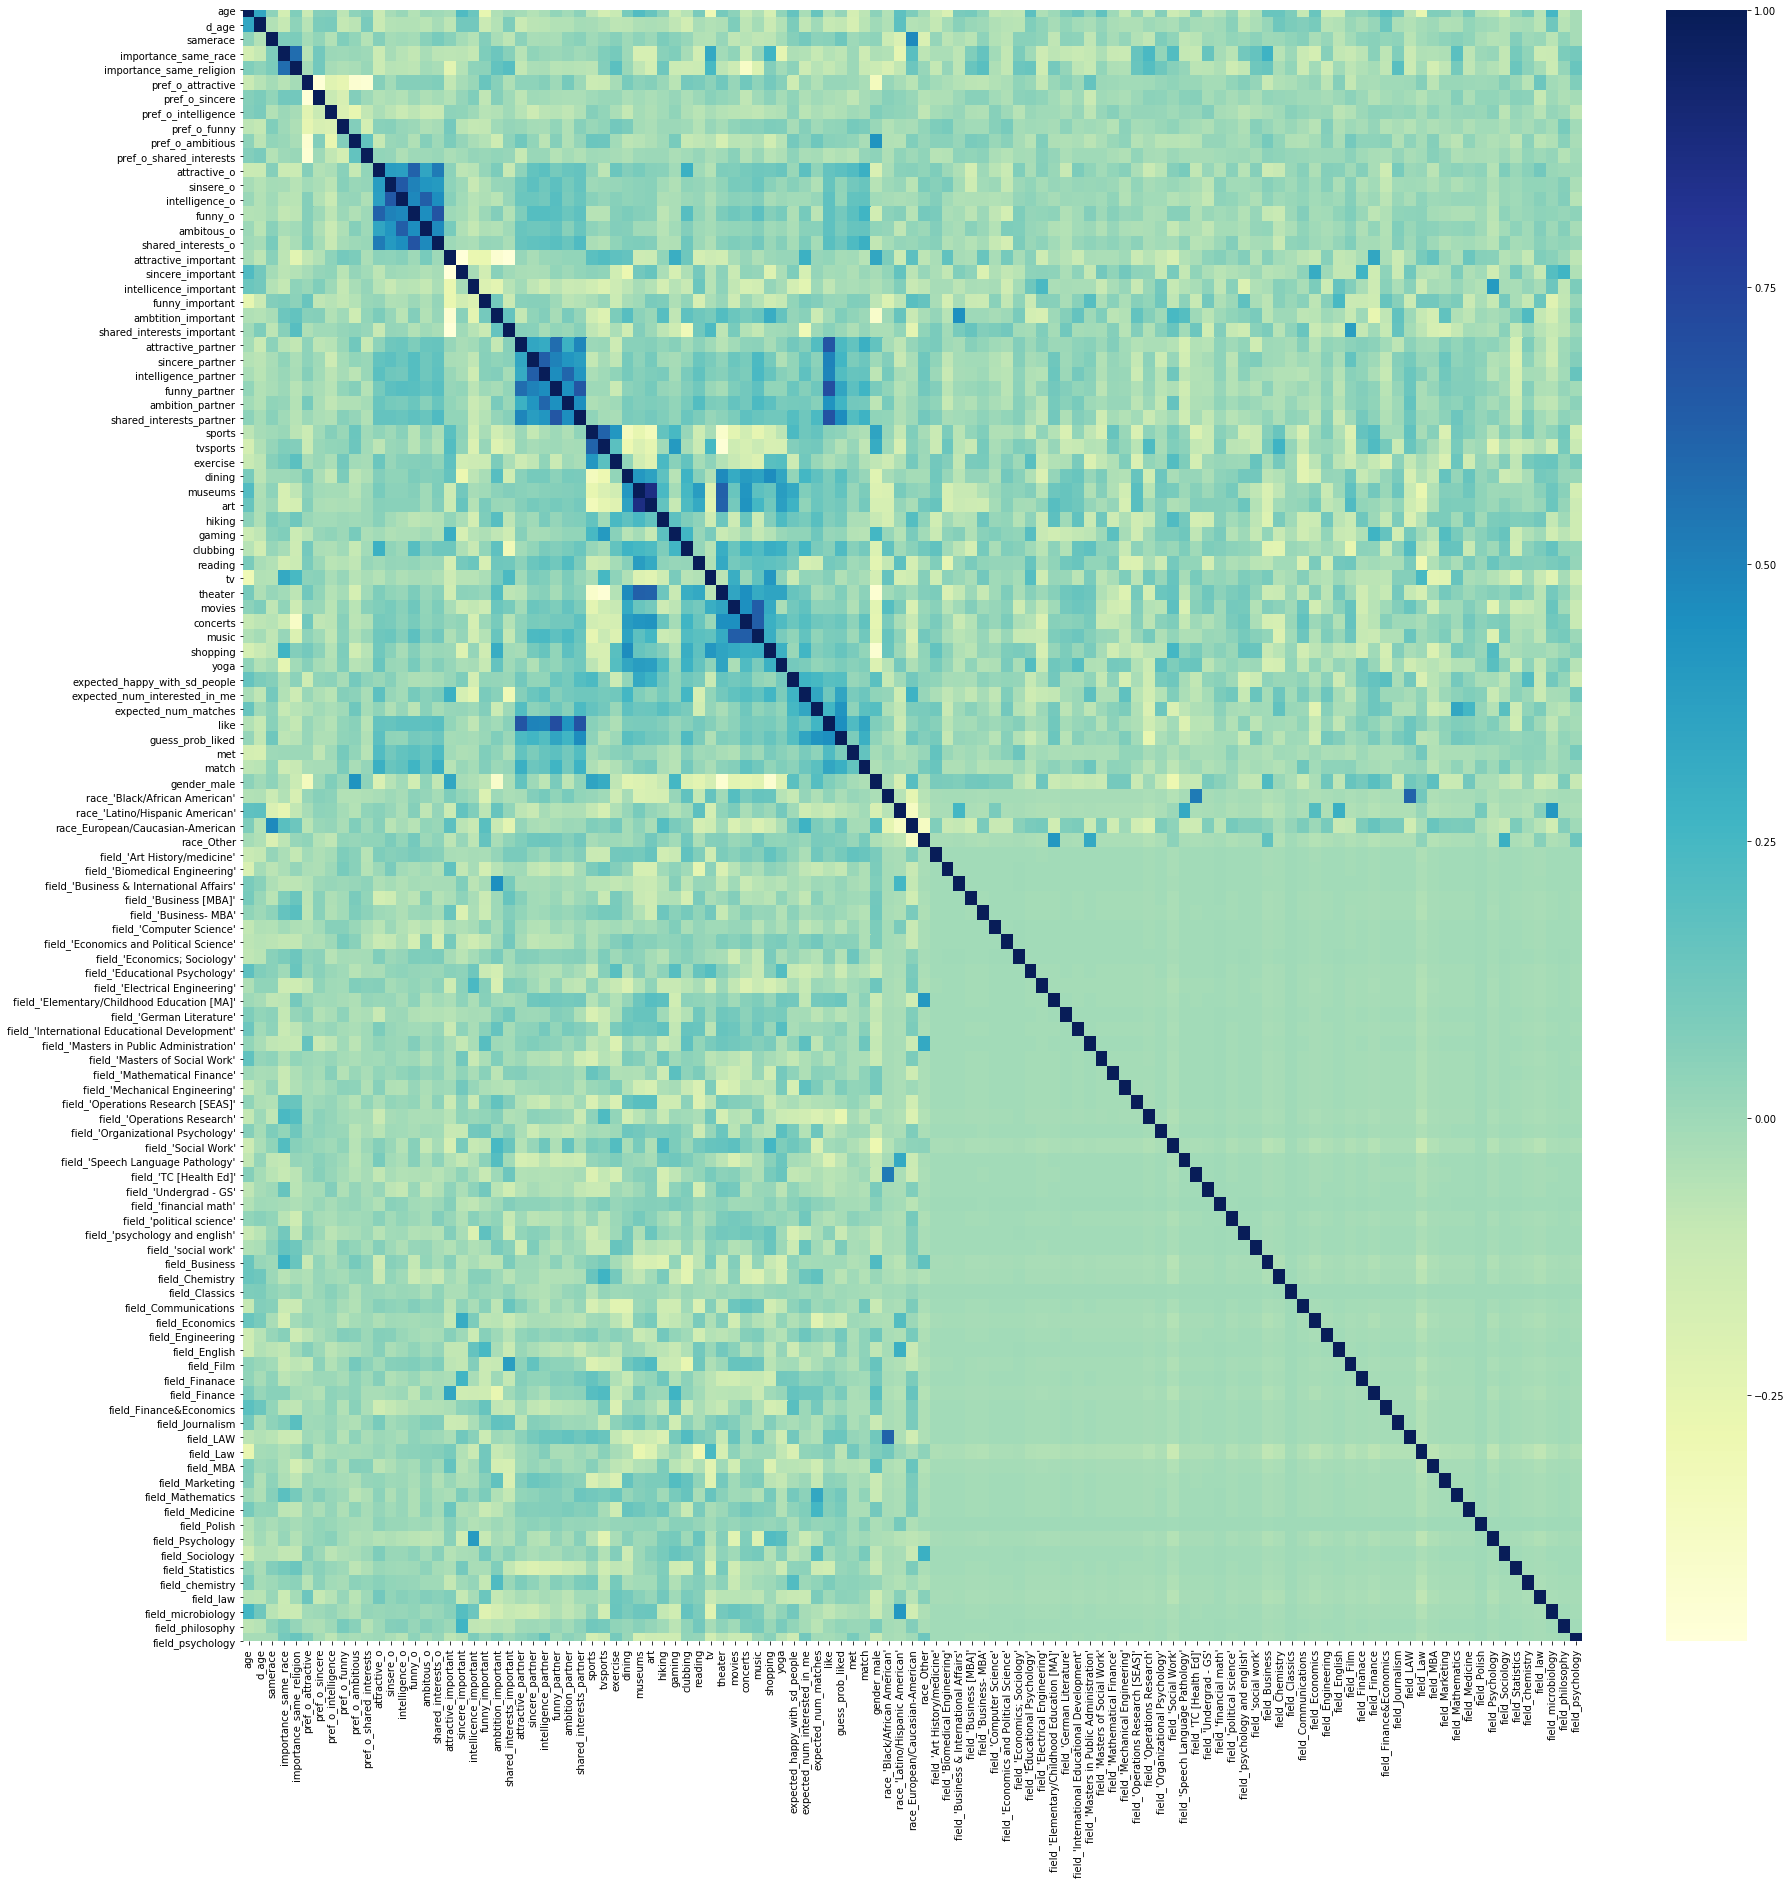

In [57]:
corr = df_drop.corr()
fig, ax = plt.subplots(figsize=(30,30))         
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax = ax)

In [58]:
mask = abs(corr > 0.2)
corr[mask]

age     d_age  samerace  \
age                                            1.000000  0.338975       NaN   
d_age                                          0.338975  1.000000       NaN   
samerace                                            NaN       NaN  1.000000   
importance_same_race                                NaN       NaN       NaN   
importance_same_religion                            NaN       NaN       NaN   
pref_o_attractive                                   NaN       NaN       NaN   
pref_o_sincere                                      NaN       NaN       NaN   
pref_o_intelligence                                 NaN       NaN       NaN   
pref_o_funny                                        NaN       NaN       NaN   
pref_o_ambitious                                    NaN       NaN       NaN   
pref_o_shared_interests                             NaN       NaN       NaN   
attractive_o                                        NaN       NaN       NaN   
sinsere_o                                           NaN       NaN       NaN   
intelligence_o                                      NaN       NaN       NaN   
funny_o                                             NaN       NaN       NaN   
ambitous_o                                          NaN       NaN       NaN   
shared_interests_o                                  NaN       NaN       NaN   
attractive_important                                NaN       NaN       NaN   
sincere_important                              0.218719       NaN       NaN   
intellicence_important                              NaN       NaN       NaN   
funny_important                                     NaN       NaN       NaN   
ambtition_important                                 NaN       NaN       NaN   
shared_interests_important                          NaN       NaN       NaN   
attractive_partner                                  NaN       NaN       NaN   
sincere_partner                                     NaN       NaN       NaN   
intelligence_partner                                NaN       NaN       NaN   
funny_partner                                       NaN       NaN       NaN   
ambition_partner                                    NaN       NaN       NaN   
shared_interests_partner                            NaN       NaN       NaN   
sports                                              NaN       NaN       NaN   
tvsports                                            NaN       NaN       NaN   
exercise                                            NaN       NaN       NaN   
dining                                              NaN       NaN       NaN   
museums                                        0.215300       NaN       NaN   
art                                                 NaN       NaN       NaN   
hiking                                              NaN       NaN       NaN   
gaming                                              NaN       NaN       NaN   
clubbing                                            NaN       NaN       NaN   
reading                                             NaN       NaN       NaN   
tv                                                  NaN       NaN       NaN   
theater                                             NaN       NaN       NaN   
movies                                              NaN       NaN       NaN   
concerts                                            NaN       NaN       NaN   
music                                               NaN       NaN       NaN   
shopping                                            NaN       NaN       NaN   
yoga                                                NaN       NaN       NaN   
expected_happy_with_sd_people                       NaN       NaN       NaN   
expected_num_interested_in_me                       NaN       NaN       NaN   
expected_num_matches                                NaN       NaN       NaN   
like                                                NaN       NaN       NaN   
guess_prob_liked       

Drop columns with low correlation

In [59]:
keep_columns = corr[mask].sum() > 2

In [60]:
keep_columns = keep_columns[keep_columns == True].index

In [61]:
keep_columns = list(keep_columns)

In [62]:
df_filtered = df_drop[keep_columns]

## Check Outliers

<Figure size 432x288 with 0 Axes>

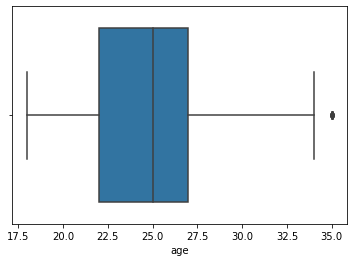

<Figure size 432x288 with 0 Axes>

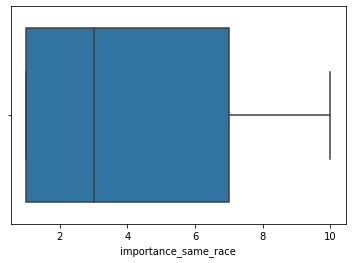

<Figure size 432x288 with 0 Axes>

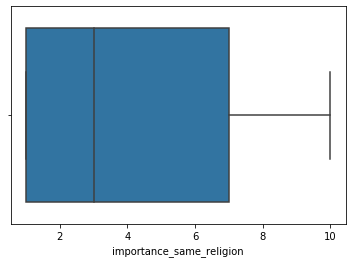

<Figure size 432x288 with 0 Axes>

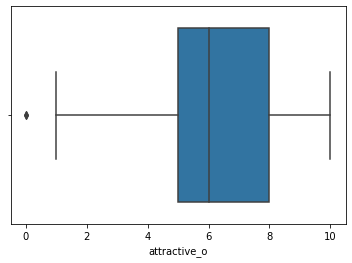

<Figure size 432x288 with 0 Axes>

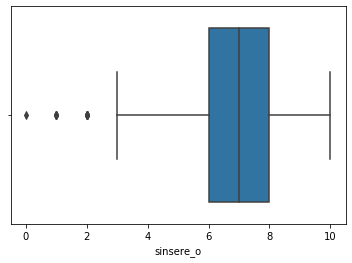

<Figure size 432x288 with 0 Axes>

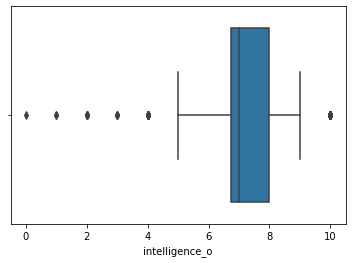

<Figure size 432x288 with 0 Axes>

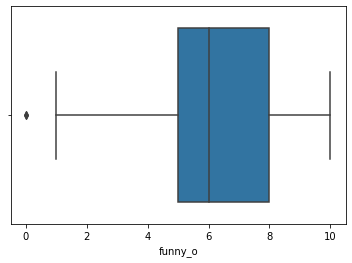

<Figure size 432x288 with 0 Axes>

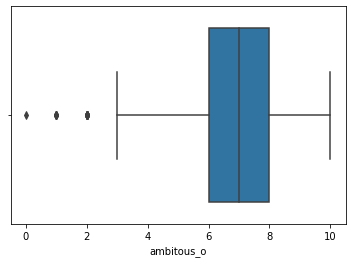

<Figure size 432x288 with 0 Axes>

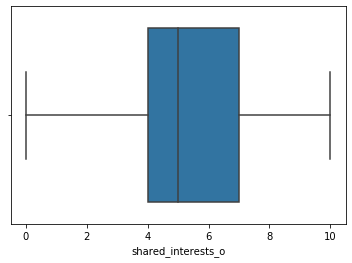

<Figure size 432x288 with 0 Axes>

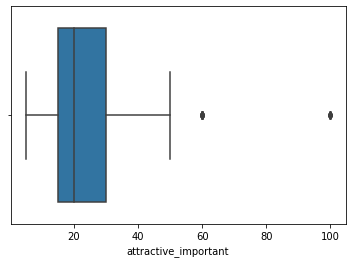

<Figure size 432x288 with 0 Axes>

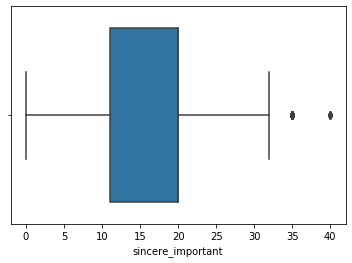

<Figure size 432x288 with 0 Axes>

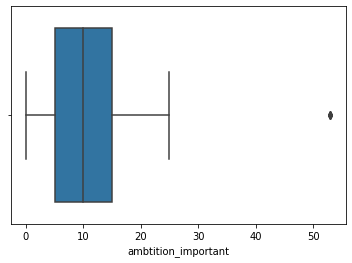

<Figure size 432x288 with 0 Axes>

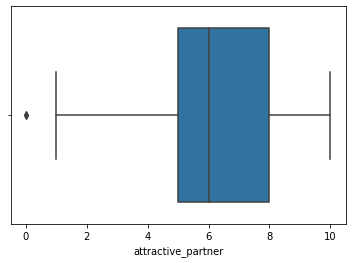

<Figure size 432x288 with 0 Axes>

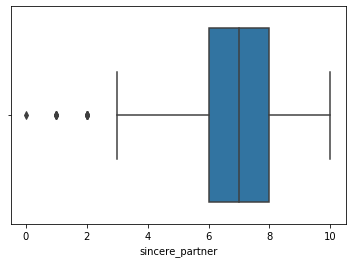

<Figure size 432x288 with 0 Axes>

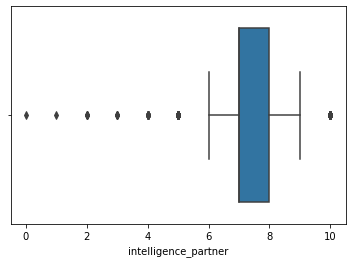

<Figure size 432x288 with 0 Axes>

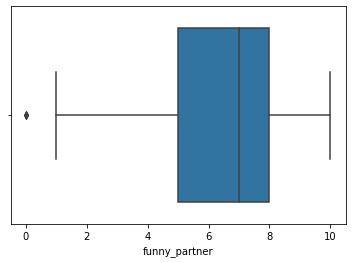

<Figure size 432x288 with 0 Axes>

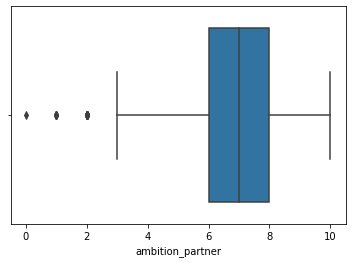

<Figure size 432x288 with 0 Axes>

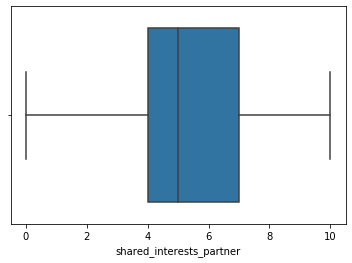

<Figure size 432x288 with 0 Axes>

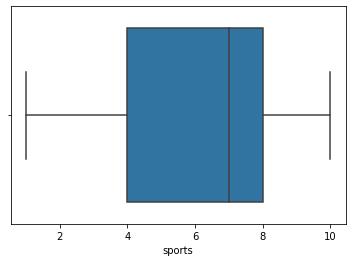

<Figure size 432x288 with 0 Axes>

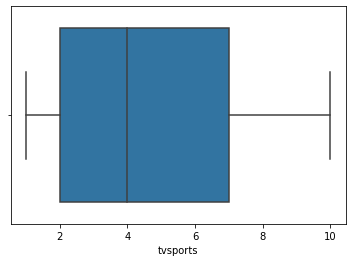

<Figure size 432x288 with 0 Axes>

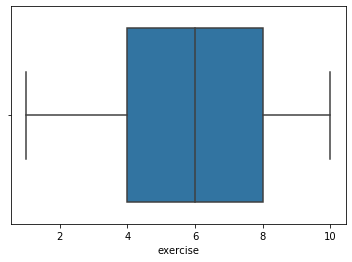

<Figure size 432x288 with 0 Axes>

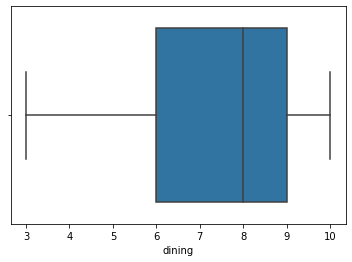

<Figure size 432x288 with 0 Axes>

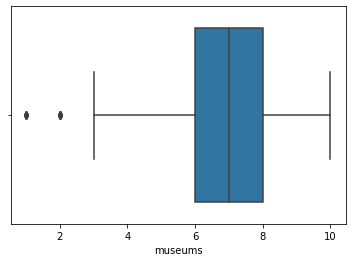

<Figure size 432x288 with 0 Axes>

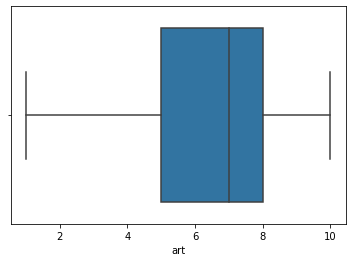

<Figure size 432x288 with 0 Axes>

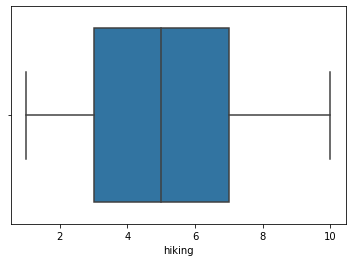

<Figure size 432x288 with 0 Axes>

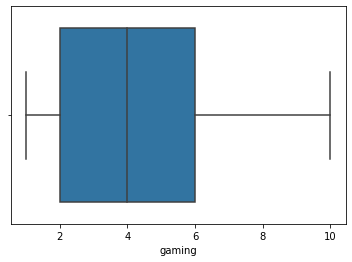

<Figure size 432x288 with 0 Axes>

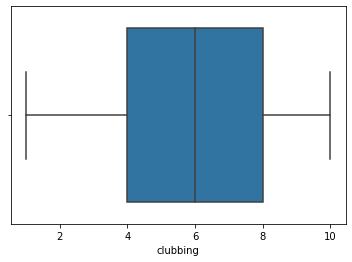

<Figure size 432x288 with 0 Axes>

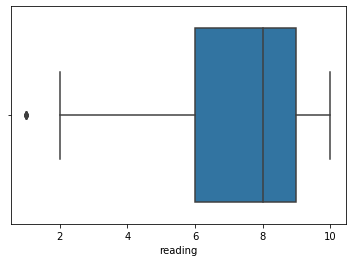

<Figure size 432x288 with 0 Axes>

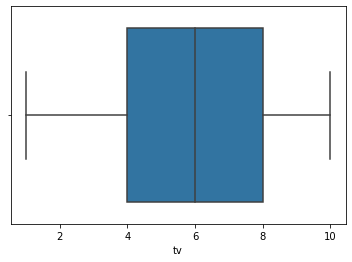

<Figure size 432x288 with 0 Axes>

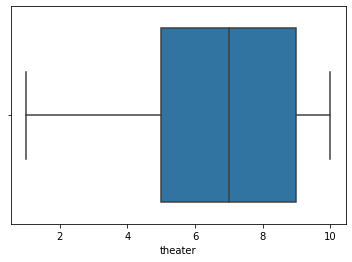

<Figure size 432x288 with 0 Axes>

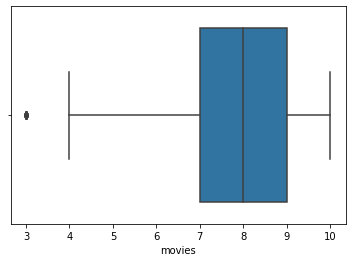

<Figure size 432x288 with 0 Axes>

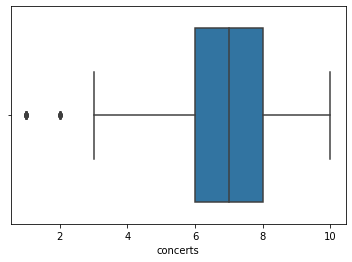

<Figure size 432x288 with 0 Axes>

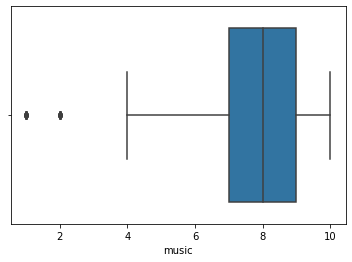

<Figure size 432x288 with 0 Axes>

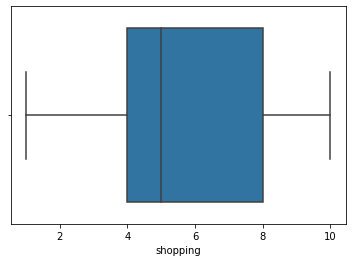

<Figure size 432x288 with 0 Axes>

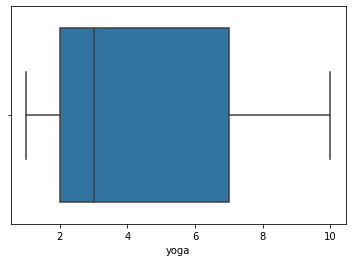

<Figure size 432x288 with 0 Axes>

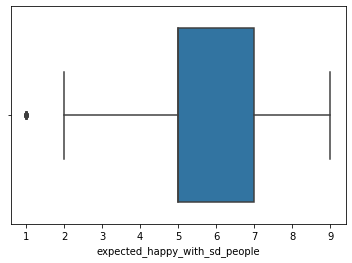

<Figure size 432x288 with 0 Axes>

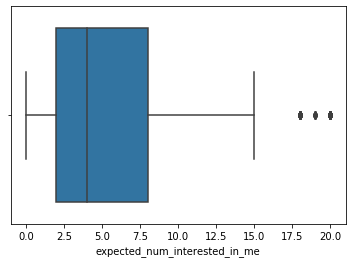

<Figure size 432x288 with 0 Axes>

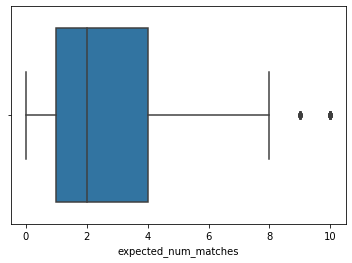

<Figure size 432x288 with 0 Axes>

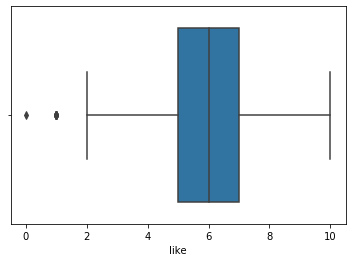

<Figure size 432x288 with 0 Axes>

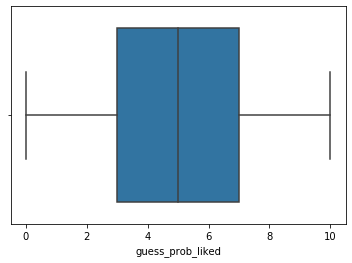

<Figure size 432x288 with 0 Axes>

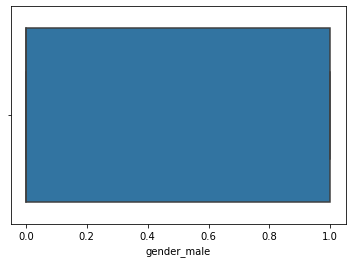

<Figure size 432x288 with 0 Axes>

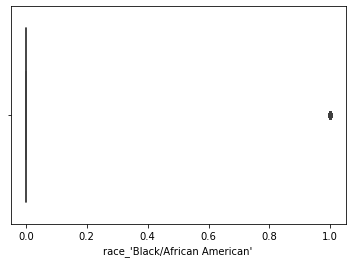

<Figure size 432x288 with 0 Axes>

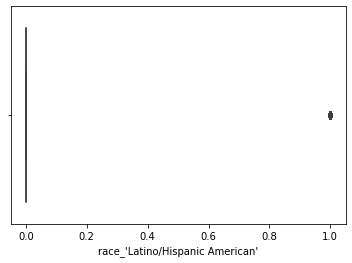

<Figure size 432x288 with 0 Axes>

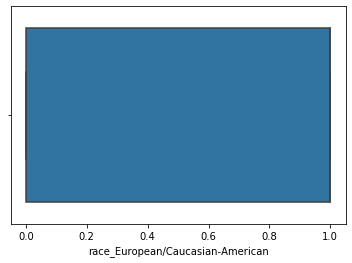

<Figure size 432x288 with 0 Axes>

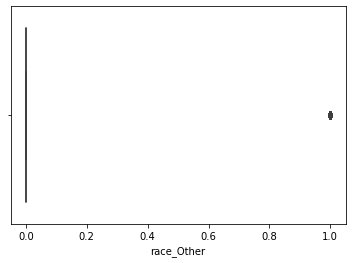

<Figure size 432x288 with 0 Axes>

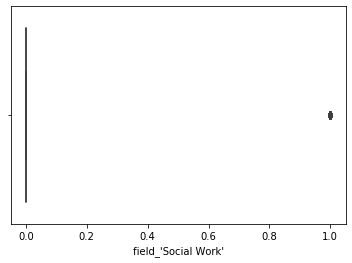

In [64]:
col = df_filtered.drop('match', axis = 1).columns

for i in col:
    plt.figure()
    sns.boxplot(x = df_filtered[i])
    plt.show()

# Machine Learning

## Split the data

In [69]:
target_df = df_filtered.match
data_df = df_filtered.drop('match', axis = 1)

In [70]:
data_df.describe()

age  importance_same_race  importance_same_religion  \
count  1048.000000           1048.000000               1048.000000   
mean     25.005725              4.017176                  4.143130   
std       3.270365              3.028627                  3.020549   
min      18.000000              1.000000                  1.000000   
25%      22.000000              1.000000                  1.000000   
50%      25.000000              3.000000                  3.000000   
75%      27.000000              7.000000                  7.000000   
max      35.000000             10.000000                 10.000000   

       attractive_o   sinsere_o  intelligence_o      funny_o   ambitous_o  \
count   1048.000000  1048.00000     1048.000000  1048.000000  1048.000000   
mean       6.210878     7.17271        7.386450     6.295802     6.802481   
std        1.964925     1.73721        1.542919     2.065383     1.828908   
min        0.000000     0.00000        0.000000     0.000000     0.000000   
25%        5.000000     6.00000        6.750000     5.000000     6.000000   
50%        6.000000     7.00000        7.000000     6.000000     7.000000   
75%        8.000000     8.00000        8.000000     8.000000     8.000000   
max       10.000000    10.00000       10.000000    10.000000    10.000000   

       shared_interests_o  attractive_important  ...  \
count         1048.000000           1048.000000  ...   
mean             5.422710             23.764313  ...   
std              2.167693             13.562153  ...   
min              0.000000              5.000000  ...   
25%              4.000000             15.000000  ...   
50%              5.000000             20.000000  ...   
75%              7.000000             30.000000  ...   
max             10.000000            100.000000  ...   

       expected_num_interested_in_me  expected_num_matches         like  \
count                    1048.000000           1048.000000  1048.000000   
mean                        5.760496              2.844466     6.215649   
std                         4.954703              2.370152     1.855646   
min                         0.000000              0.000000     0.000000   
25%                         2.000000              1.000000     5.000000   
50%                         4.000000              2.000000     6.000000   
75%                         8.000000              4.000000     7.000000   
max                        20.000000             10.000000    10.000000   

       guess_prob_liked  gender_male  race_'Black/African American'  \
count       1048.000000  1048.000000                    1048.000000   
mean           4.978053     0.493321                       0.037214   
std            2.269876     0.500194                       0.189376   
min            0.000000     0.000000                       0.000000   
25%            3.000000     0.000000                       0.000000   
50%            5.000000     0.000000                       0.000000   
75%            7.000000     1.000000                       0.000000   
max           10.000000     1.000000                       1.000000   

       race_'Latino/Hispanic American'  race_European/Caucasian-American  \
count                      1048.000000                       1048.000000   
mean                          0.080153                          0.606870   
std                           0.271659                          0.488678   
min                           0.000000                          0.000000   
25%                           0.000000                          0.000000   
50%                           0.000000                          1.000000   
75%                           0.000000                          1.000000   
max                           1.000000                          1.000000   

        race_Other  field_'Social Work'  
count  1048.000000          1048.000000  
mean      0.080153             0.077290  
std       0.271659             0.267179  
min       0.0000

### Scale

In [71]:
standardScalerX = StandardScaler()
df_scaled = standardScalerX.fit_transform(data_df)

In fact we do not need to scale the data, so df_scaled was not used. It was still tested but it did not improve the model

In [82]:
data_train, data_test, target_train, target_test = train_test_split(data_df, target_df, test_size = 0.2, random_state=29)

In [83]:
from collections import Counter
Counter(target_train)

Counter({1: 150, 0: 688})

In [84]:
from collections import Counter
Counter(target_test)

Counter({0: 174, 1: 36})

## Models

### Logistic Regression

In [85]:
lr = LogisticRegression()
lr.fit(data_train, target_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
acc = lr.score(data_test, target_test)*100
acc

85.71428571428571

### Decision Tree

In [87]:
dtc = DecisionTreeClassifier()
dtc.fit(data_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [88]:
acc = dtc.score(data_test, target_test)*100
acc

79.04761904761905

### Support Vector Machine

In [89]:
svm = SVC()
svm.fit(data_train, target_train)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [90]:
acc = svm.score(data_test, target_test)*100
acc

84.76190476190476

### K-Nearest Neighbour

In [91]:
neighbors = 2
knn = KNeighborsClassifier(n_neighbors = neighbors)
knn.fit(data_train, target_train)
acc = knn.score(data_test, target_test)*100
acc

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

82.85714285714286

In [92]:
for i in range(2,15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(data_train, target_train)
    acc = knn.score(data_test, target_test)*100
    print(i ,acc)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

2 82.85714285714286


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

3 80.0


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

4 83.80952380952381


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

5 83.80952380952381


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

6 83.33333333333334


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

7 82.38095238095238


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

8 83.33333333333334


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

9 83.33333333333334


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

10 82.38095238095238


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

11 81.9047619047619


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

12 82.85714285714286


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

13 83.80952380952381


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

14 83.33333333333334


## Model Evaluation | Logistic Regression 

### Check for overfitting

In [95]:
acc_train = lr.score(data_train, target_train)
acc_train 

0.8842482100238663

acc_train = 0.88 and acc_test = 0.86

### Confusion Matrix

In [98]:
target_pred = lr.predict(data_test)

In [99]:
confusion_matrix(target_test, target_pred)

array([[167,   7],
       [ 23,  13]])

Function to assist in printing name and value

In [100]:
def debug(variable):
    print (variable, '=', repr(eval(variable)))

In [101]:
tn, fp, fn, tp = confusion_matrix(target_test, target_pred).ravel()

variables_name = ['tn', 'fp', 'fn', 'tp']
variables = [tn, fp, fn, tp]

for i, n in zip(variables_name, variables):
    print(i, '=', n)

tn = 167
fp = 7
fn = 23
tp = 13


In [102]:
predict_positive = tp + fp
predict_negative = fn + tn
actual_positive = tp + fn
actual_negative = fp + tn

values_name = ['predict_positive', 'predict_negative', 'actual_positive', 'actual_negative']
values = [predict_positive, predict_negative, actual_positive, actual_negative]

for i, n in zip(values_name, values):
    print(i, '=', n)

predict_positive = 20
predict_negative = 190
actual_positive = 36
actual_negative = 174


In [103]:
sensitivity = tp / actual_positive
false_negative_rate = fn / actual_positive
false_positive_rate = fp / actual_negative
specificity = tn / actual_negative
accuracy = (tp + tn) / (actual_negative + actual_positive)
f1_score = (2 *  tp) / ((2 * tp) + fp + fn)
precision = tp / predict_positive
FDR = fp / predict_positive
false_omission_rate = fn / predict_negative
negative_predictive_value = tn / predict_negative

In [104]:
measures_name = ['recall', 'false_negative_rate', 'false_positive_rate', 'specificity', 'accuracy', 'f1_score', 'precision', 'FDR', 'false_omission_rate', 'negative_predictive_value' ]
measures = [sensitivity, false_negative_rate, false_positive_rate, specificity, accuracy, f1_score, precision, FDR, false_omission_rate, negative_predictive_value ]

for i, n in zip(measures_name, measures):
    print(i, '=', n)

recall = 0.3611111111111111
false_negative_rate = 0.6388888888888888
false_positive_rate = 0.040229885057471264
specificity = 0.9597701149425287
accuracy = 0.8571428571428571
f1_score = 0.4642857142857143
precision = 0.65
FDR = 0.35
false_omission_rate = 0.12105263157894737
negative_predictive_value = 0.8789473684210526
